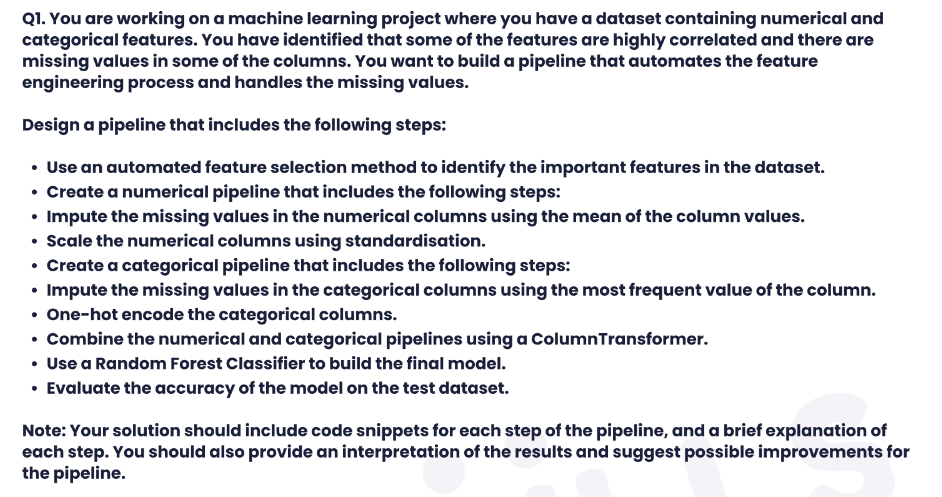

In [1]:
## Dataset

import seaborn as sns
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### So lets start

### we have datsets of penguins in which penguin's species , island, body mass etc are given.

### AIM -- We have to make a model such that it predicts Species of Penguin by taking remaining feature as inputs.

In [2]:
df.shape

(344, 7)

In [3]:
## Missing values

df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [6]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [7]:
## Converting Our Target feature into numerical

from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
df['species'] = Encoder.fit_transform(df['species'])

In [8]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,0,Torgersen,39.5,17.4,186.0,3800.0,Female
2,0,Torgersen,40.3,18.0,195.0,3250.0,Female
3,0,Torgersen,NaN,NaN,NaN,NaN,NaN
4,0,Torgersen,36.7,19.3,193.0,3450.0,Female


In [9]:
df['species'].unique()

array([0, 1, 2])

In [10]:
## Independent and Dependent Features

X = df.drop(labels=['species'],axis=1)
y = df.species

In [11]:
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,Female


In [12]:
y

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int64

In [13]:
## Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [14]:
X_train.shape, y_train.shape

((275, 6), (275,))

In [15]:
X_test.shape, y_test.shape

((69, 6), (69,))

In [16]:
## Creating pipeline

# 1. Importing Necessary libraies
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer ## For handling missing values
from sklearn.preprocessing import StandardScaler ## for scaling 
from sklearn.preprocessing import OneHotEncoder ## for encoding
from sklearn.compose import ColumnTransformer

In [17]:
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,Female


In [18]:
# 2. Dividing the dataset between categorical and numerical
num_col = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
cat_col = ['island','sex']

In [19]:
# 3. Feature Scaling automation

num_pipeline = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    
]
)

cat_pipeline = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encode',OneHotEncoder()),
    ('scaler',StandardScaler(with_mean=False))
    
]
)

In [20]:
# 4. Combine both the Pipelines

preprocessor = ColumnTransformer([
    ('num_pipeline',num_pipeline,num_col),
    ('cat_pipeline',cat_pipeline,cat_col)

])

In [27]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['bill_length_mm', 'bill_depth_mm',
                                  'flipper_length_mm', 'body_mass_g']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode', OneHotEncoder()),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 ['island', 'sex'])])

In [21]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [22]:
## Model Training Automation

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
## Prediction

y_pred = rfc.predict(X_test)

In [24]:
y_pred

array([1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 2, 0,
       0, 0, 0])

In [25]:
## Accuracy check
from sklearn.metrics import accuracy_score,confusion_matrix

print('Acuracy of the Model',accuracy_score(y_test,y_pred))

Acuracy of the Model 0.9855072463768116


In [26]:
print(confusion_matrix(y_test,y_pred))

[[32  0  0]
 [ 1 15  0]
 [ 0  0 21]]


In [27]:
## Hyperparameter Tuning

parameters = {'max_depth':[3,5,10,None],
             'n_estimators':[100,200,300],
             'criterion':['gini','entropy']
}

In [28]:
from sklearn.model_selection import RandomizedSearchCV
cv = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=parameters,
                          cv=5,
                          scoring='accuracy',
                          verbose=3)

In [29]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=10, n_estimators=300;, score=0.964 total time=   0.9s
[CV 2/5] END criterion=entropy, max_depth=10, n_estimators=300;, score=0.982 total time=   0.8s
[CV 3/5] END criterion=entropy, max_depth=10, n_estimators=300;, score=0.964 total time=   0.9s
[CV 4/5] END criterion=entropy, max_depth=10, n_estimators=300;, score=0.982 total time=   0.8s
[CV 5/5] END criterion=entropy, max_depth=10, n_estimators=300;, score=1.000 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.964 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.982 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.964 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=10, n_estimators=200;, score=1.000 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=10, n_estimators=200;, score=1.000 total time=  

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [30]:
cv.best_params_

{'n_estimators': 200, 'max_depth': 10, 'criterion': 'gini'}

In [32]:
cv.best_score_

0.9818181818181818

In [33]:
rfc_tuned = RandomForestClassifier(n_estimators=200,max_depth=10,criterion='gini')

In [34]:
rfc_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [35]:
y_pred_tuned = rfc_tuned.predict(X_test)

In [36]:
y_pred_tuned

array([1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 2, 0,
       0, 0, 0])

In [37]:
print(accuracy_score(y_test,y_pred_tuned))

0.9855072463768116


## Conclusion

### 1. By comparing our default model accuracy with tuned model we get almost same accuracy around 98%

# Q2. Build a pipeline that includes a random forest classifier and a logistic regression classifier, and then use a voting classifier to combine their predictions. Train the pipeline on the iris dataset and evaluate its accuracy.

In [50]:
## Dataset

import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [51]:
df.shape

(150, 5)

In [53]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

### Here our target variable is 'species'.

In [54]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [55]:
## Encoding the 'species'

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [56]:
df.species.unique()

array([0, 1, 2])

In [57]:
## Independent and dependent features

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [59]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
## Train test split

from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=42)

In [61]:
## Pipeline Making

from sklearn.pipeline import Pipeline  
from sklearn.impute import SimpleImputer # for handling missing values 
from sklearn.preprocessing import StandardScaler # for feature scaling 
from sklearn.preprocessing import OneHotEncoder # Categorical to numerical
from sklearn.compose import ColumnTransformer

In [62]:
# 1. Dividing the dataset
## Here all are numerical features
numerical_cols = ['sepal_length','sepal_width','petal_length','petal_width']

In [64]:
# 2.  Feature Engineering Automation

## Numericalm Pipeline

num_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')), ## Missing handled
        ('scaler',StandardScaler())])

In [65]:
# 3. Column Transformation
preprocessor = ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols)])

In [67]:
Xtrain = preprocessor.fit_transform(Xtrain)
Xtest = preprocessor.transform(Xtest)

In [74]:
## Model Trainin Automation

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Defining Base models
rfc = RandomForestClassifier(n_estimators=100,max_depth=4)
lr = LogisticRegression(C=1.0)

# Voting Classifier Pipeline
vc = VotingClassifier(estimators=[('rfc',rfc),
                                  ('lr',lr)],
                                  voting='soft')

In [75]:
vc.fit(Xtrain,ytrain)

VotingClassifier(estimators=[('rfc', RandomForestClassifier(max_depth=4)),
                             ('lr', LogisticRegression())],
                 voting='soft')

In [77]:
## Prediction
ypred_test = vc.predict(Xtest)
ypred_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [80]:
# Accuracy check
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest,ypred_test)
print(f'Accuracy on Final Voting Classifier model is {acc*100}%')

Accuracy on Final Voting Classifier model is 100.0%
